In [7]:
'''
Задание 14. Геральдические символы Москвы
Сгенерируйте PDF документ из списка флагов и гербов районов Москвы:
https://video.ittensive.com/python-advanced/data-102743-2019-11-13.utf.csv

На каждой странице документа выведите название геральдического символа (Name), его описание (Description) 
и его изображение (Picture).
Для показа изображений используйте адрес https://op.mos.ru/MEDIA/showFile?id=XXX
где XXX - это значение поля Picture в наборе данных. 
Например:
https://op.mos.ru/MEDIA/showFile?id=8466da35-6801-41a9-a71e-04b60408accb
В случае возникновения проблем с загрузкой изображений с op.mos.ru можно добавить в код настройку 
для форсирования использования дополнительных видов шифрования в протоколе SSL/TLS.
requests.packages.urllib3.util.ssl_.DEFAULT_CIPHERS = 'ALL:@SECLEVEL=1'

Если на каждой странице PDF документа выводить по одному геральдическому символу, то сколько получится страниц?
'''

import pandas as pd # Импортирование библиотеки Pandas
import pdfkit # Импортирование библиотеки Pdfkit
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-102743-2019-11-13.utf.csv", delimiter=";") 
# Загрузка csv-файла и разделение столбцов по ";" в строках CSV-файла
print (data) # Вывод данных Pandas из переменной data
print ("----------------------------------------------------------------------------------------------------------------")
# Вывод разделяющей строки для лучшего восприятия данных
html = '''<html> #
<head>
    <title>Геральдические символы Москвы</title>
    <meta charset="utf-8"/>
</head>
<body>'''
for i, item in data.iterrows(): # перебор данных через data.iterrows
    if i == 0: # для первого заголовка стиль не задаём
        html += '<h1>' + item['Name'] + '</h1>'
    else: # для всех остальных установка стиля
        html += '<h1 style="page-break-before:always">' + item['Name'] + '</h1>'
    html += '''<p> # вставка разрыва страницы после первого заголовка (получение каждого геральдического символа с названием на отдельной странице)
        <img style="width:80%;margin-left:10%" # увеличенный вид изображения
        src="https://op.mos.ru/MEDIA/showFile?id=''' + item['Picture'] + '''"> # Источник изображения src задаётся через ссылку в нужном формате (к исходному формату ссылки добавляется значение поля picture из кортежа данных)
    </p>'''
    html += '<p style="font-size:150%">' + item['Description'] + '</p>' # выведение изображения геральдического символа в увеличенном виде, используя атрибут style. Font-size – делает шрифт крупнее
html += '</body></html>'

config = pdfkit.configuration(wkhtmltopdf='C:\\Program Files\\wkhtmltopdf\\bin\\wkhtmltopdf.exe') # Конфигурация pdfkit стандартным образом с указанием пути до бинарного файла 
options = {
    'page-size': 'A4', # задание размера страницы 
    'header-right': '[page]' # установка номера страницы и её расположения
}
pdfkit.from_string(html, 'C:\\Users\\Roman\\Downloads\\heraldic.pdf',
                    configuration=config, options=options) # генерация из строки html-файла, сохранение его в файл heraldic.pdf  


    ID                                               Name  Type  \
0    1  Герб муниципального округа Новокосино в городе...  Герб   
1    2  Флаг муниципального округа Новокосино в городе...  Флаг   
2    3  Герб муниципального округа Нагатино-Садовники ...  Герб   
3    4  Флаг муниципального округа Нагатино-Садовники ...  Флаг   
4    5  Герб муниципального округа Марфино в городе Мо...  Герб   
5    6  Флаг муниципального округа Марфино в городе Мо...  Флаг   
6    7  Герб муниципального округа Ломоносовский в гор...  Герб   
7    8  Флаг муниципального округа Ломоносовский в гор...  Флаг   
8    9  Герб муниципального округа Косино-Ухтомский в ...  Герб   
9   10  Флаг муниципального округа Косино-Ухтомский в ...  Флаг   
10  11  Герб муниципального округа Ивановское в городе...  Герб   
11  12  Флаг муниципального округа Ивановское в городе...  Флаг   
12  13  Герб муниципального округа Донской в городе Мо...  Герб   
13  14  Флаг муниципального округа Донской в городе Мо...  Фла

True

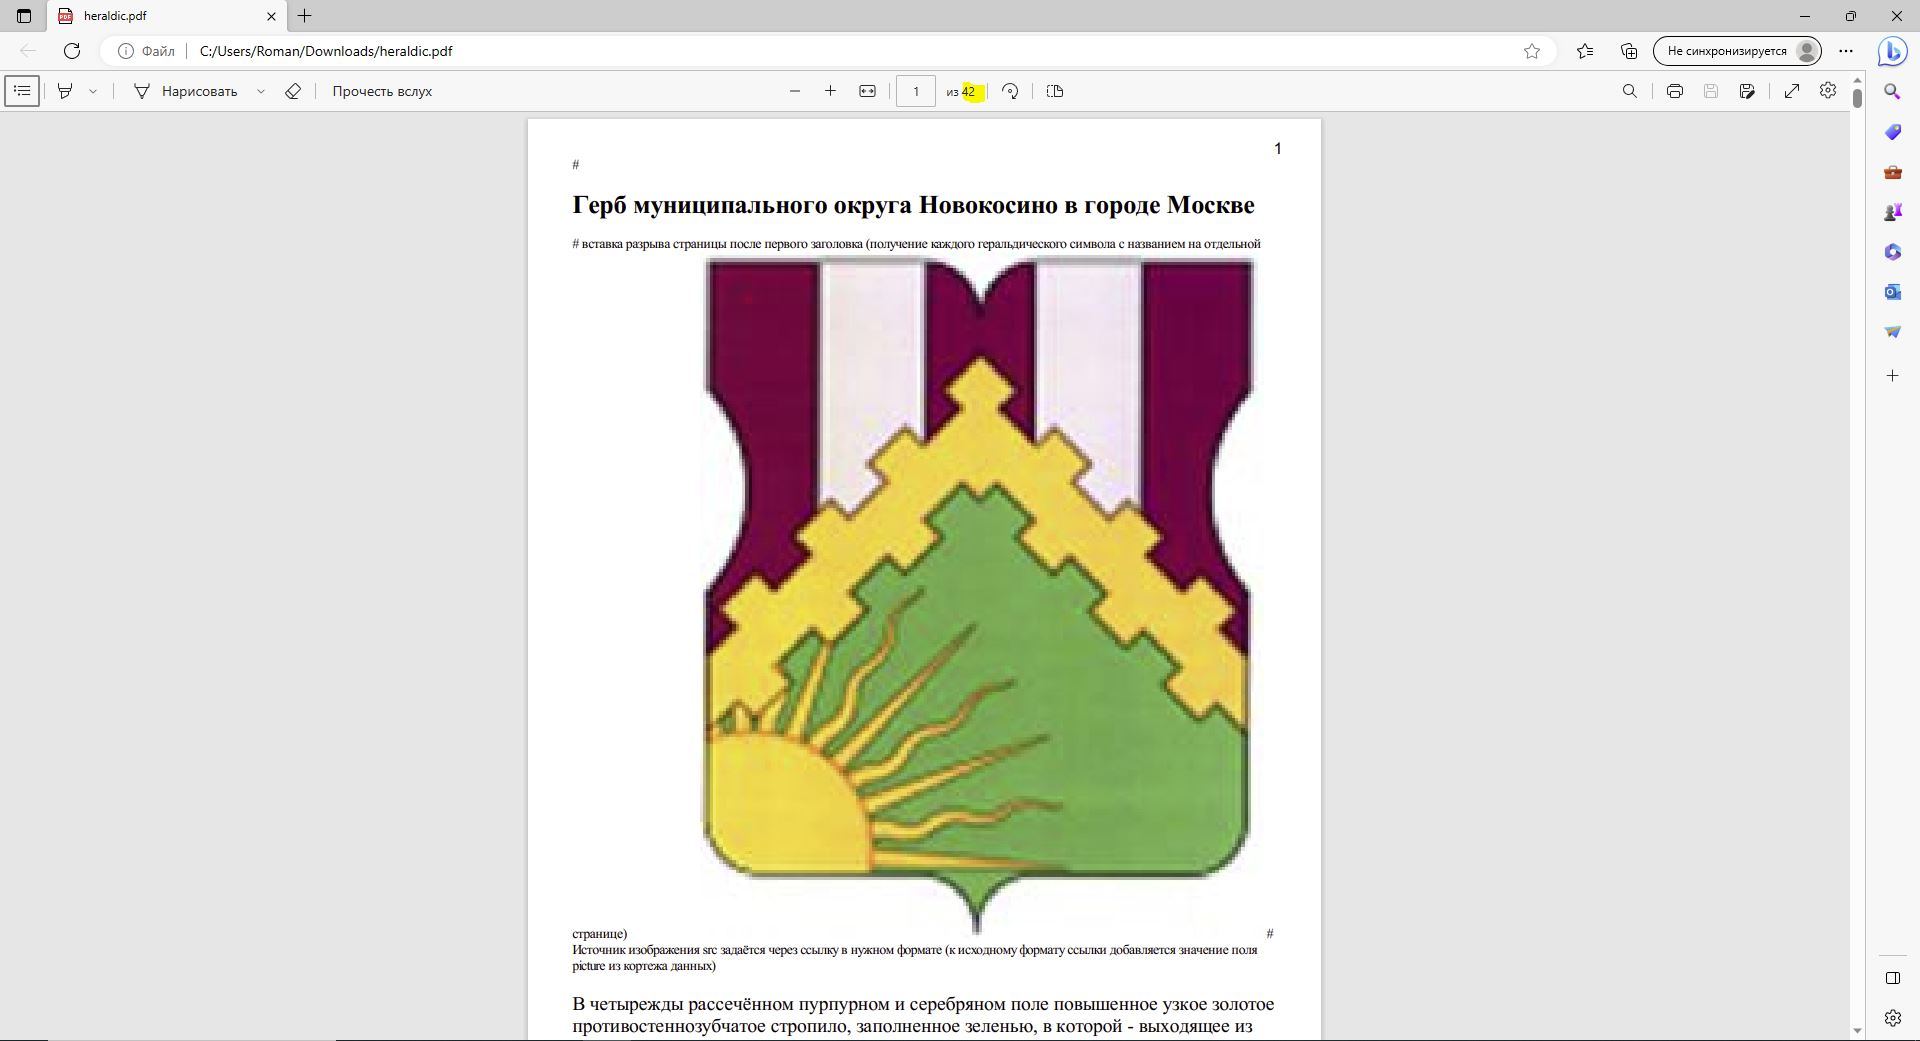